# Data Science 410 BB
## University of Washington Professional & Continuing Education

### Homework 1: Univatirate Visualzation & Summary Statstical Methods
### Leo Salemann
### 1/10/18


# TALL BUILDINGS ARE HARDER TO HEAT UP
And two other amazing facts about the UCI Energy Efficiency Data Set 

## Introduction
Need some words here ... 

## Thirteen or Thirty: A Tale of Two Humps in the Heating Load
Taken as a whole, most of the 750 builidings have a heating load of about 13 or 30, with more variation around the 30. A simple density plot makes this clear (below)

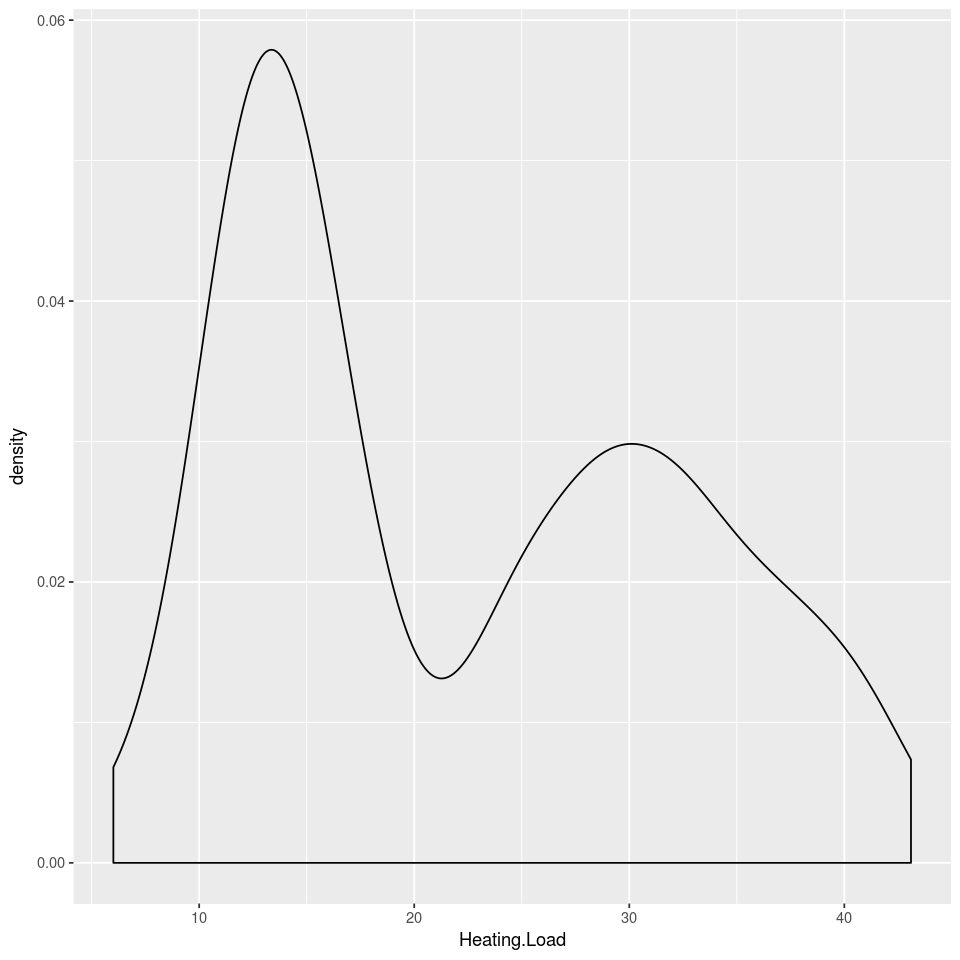

In [156]:
read.energy = function(file = 'EnergyEfficiencyData.csv'){
  ## Read the csv file
  bldg.energy <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)

 
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  # bldg.energy[complete.cases(bldg.energy), ]
}

ggplot(bldg.energy, aes(Heating.Load)) + geom_density()

What's not clear, is whether this is 13 vs. 30 [Kilowatts, BTUs, or some multiple thereof](http://www.tombling.com/cooling/heat-load-calculations.htm). Even the [technical paper](http://people.maths.ox.ac.uk/tsanas/Preprints/ENB2012.pdf) associated with the [dataset](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#) doesn't deign to delve into real-world units of measure. But we have our two humps.

## Correlations & Clusters: Finding the Two-Hump Culprit
The quickest way to find something is to look at everything at once. A scatterplot matrix, with correlation values in the upper-right, histrograms down the middle, and color based on Overall Height, shows Roof Area and Overall Height as the two variables most strongly correlated to heating load. The coloring and clustering of of the scatterplot ponts, as well at the shape of the histograms, suggest possible sources or the "two-hump" phenomenan. 

It's also worth mentioning the rigid regularity of Orientation, Glazing Area and Glazing Area Distribution. It's unlikely this dataset came form field observations, unless the team was extremely selective about which buildings they picked (and yet manaaged come up with over 700 of them). A quick read at the [technical paper's abstract](http://www.sciencedirect.com/science/article/pii/S037877881200151X) confirms the data was generated by a simulation.

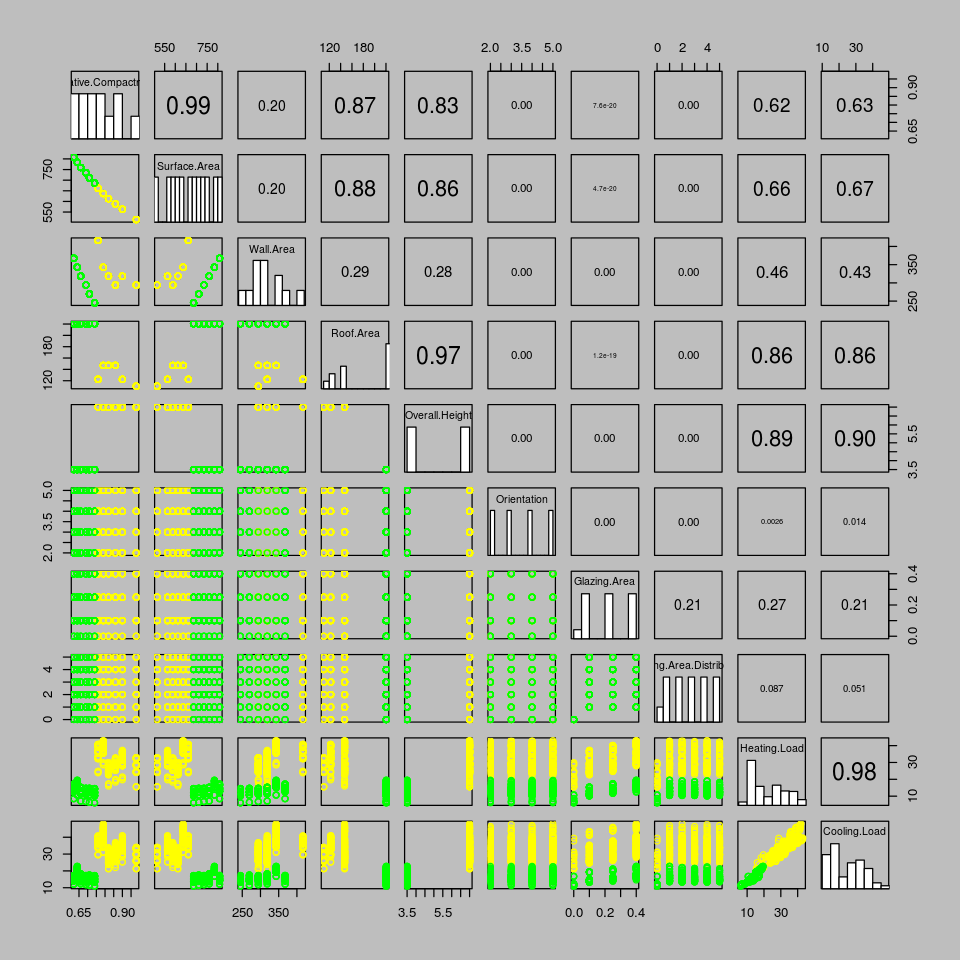

In [157]:
panel.hist = function(x, ...){
  usr = par('usr')
  on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5))
  h = hist(x, plot=FALSE)
  breaks = h$breaks
  nB = length(breaks)
  y=h$counts
  y=y/max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col='white')
}

panel.cor = function(x, y, digits=2, prefix="", cex.cor, ...){
  usr = par("usr")
  on.exit(par(usr))
  par(usr = c(0,1,0,1))
  r = abs(cor(x,y,use='complete.obs'))
  txt=format(c(r,0.123456789),digits=digits)[1]
  txt=paste(prefix,txt,sep='')
  if(missing(cex.cor)) cex.cor = 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor*(1+r)/2)
}

par(bg="gray")

cols2 <- character(nrow(bldg.energy))
cols2[] <- "black"
cols2[bldg.energy$Overall.Height == 3.5] <- "green"
cols2[bldg.energy$Overall.Height == 7] <- "yellow"

pairs(bldg.energy[,0:10], 
      col=cols2, 
      diag.panel = panel.hist,
      upper.panel = panel.cor)

Code based on [Scatterplot matrices with ggplot](https://gastonsanchez.wordpress.com/2012/08/27/scatterplot-matrices-with-ggplot/) by [Gaston Scanchez](http://www.gastonsanchez.com/) in [Data Anaysis Visually Enforced](https://gastonsanchez.wordpress.com/)

Background color from [pakt](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781849513067/2/ch02lvl1sec03/setting-plot-background-colors)

Dot color form [stack overflow](https://stackoverflow.com/questions/15599717/coloring-points-in-a-pairs-plot)

Histogram diagonals & correlation from [R Graphics Cookbook](https://rstudio-pubs-static.s3.amazonaws.com/86962_975473a9afe44d03832f9a65bc1a39c2.html)

## Peeling the Onion: Fnding two humps (and a half)
We're going to skip a few of the strongly-correlated variables, and see what we can tease out of one of the more "cloudy" scatter plots.  As with the matrix plot, coloring by overall height shows strong separation of heating load by ehight. Density contours demonstrate how the taller buidligns actually separte into two "nodes" centered at 30 and 38, repesctivvely. Sizing by Glazing area shows the strong positive correlation between glass added and heating load. 

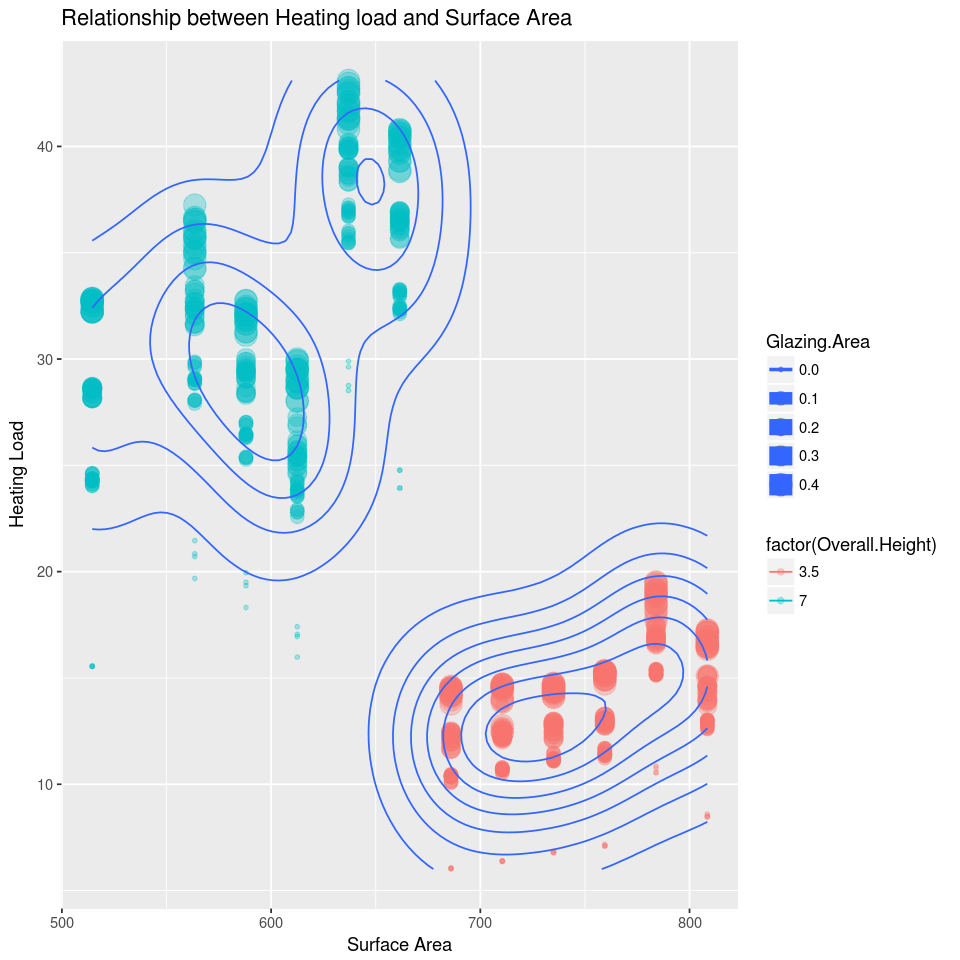

In [158]:
ggplot(bldg.energy, aes(x = Surface.Area, 
           y = Heating.Load,))+ 
geom_point(aes(color = factor(Overall.Height),
               size = Glazing.Area),
               alpha = 0.3) + 
geom_density2d() +
xlab('Surface Area') + 
ylab('Heating Load') + 
ggtitle('Relationship between Heating load and Surface Area')

## Conclusion(s)
Through visual investigatin, we've  been ablet to ....
- Two humps from Roof Area and/or height
  - High correlation, two-hump histograms
- simulated data (regular scatterplots)

## What we still don't know ...
- What if we looked at more heights or more variation in roof area?
- spread it out more, would the correlation hold? How spread-out is it in nature, though?